In [2]:
import numpy as np
import pandas as pd

In [3]:
transactions = pd.read_csv(
    r"D:\ml\Udemy - Data Analysis with Python - NumPy & Pandas Masterclass\1. Getting Started\3.2 Pandas Course Resources\Pandas Course Resources\retail\transactions.csv", parse_dates=['date'])
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


<Axes: >

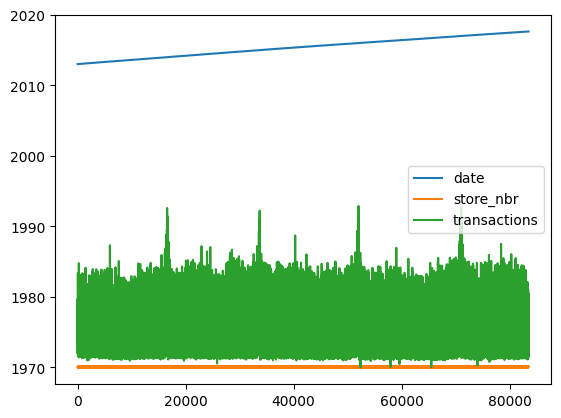

In [4]:
# drawing a ugly plot

transactions.plot()

BEAUTIFICATION


In [5]:
transactions.set_index('date').loc['2013-01', 'transactions']

# we have filterd data index is date and acording the date of 2013-1 we have our transactions

date
2013-01-01     770
2013-01-02    2111
2013-01-02    2358
2013-01-02    3487
2013-01-02    1922
              ... 
2013-01-31    2432
2013-01-31    1573
2013-01-31    2153
2013-01-31    1524
2013-01-31     714
Name: transactions, Length: 1381, dtype: int64

<Axes: xlabel='date'>

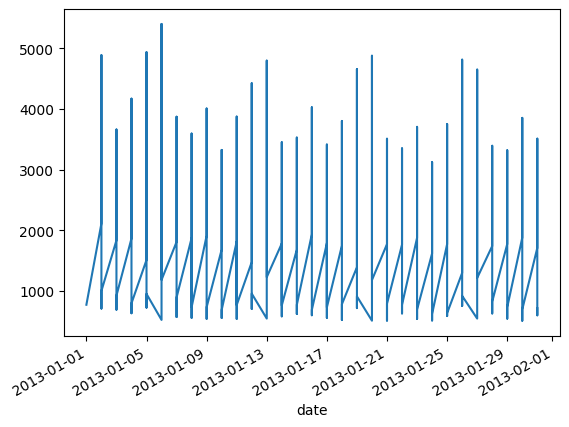

In [6]:
transactions.set_index('date').loc['2013-01', 'transactions'].plot()
# still confusing too many values

In [7]:
# let us consider the transactions for a particular store only

transactions.query('store_nbr==44').set_index(
    'date').loc['2013-01', 'transactions']

date
2013-01-02    4821
2013-01-03    3618
2013-01-04    4169
2013-01-05    4921
2013-01-06    4925
2013-01-07    3871
2013-01-08    3593
2013-01-09    4006
2013-01-10    3323
2013-01-11    3873
2013-01-12    4423
2013-01-13    4676
2013-01-14    3450
2013-01-15    3527
2013-01-16    4026
2013-01-17    3412
2013-01-18    3801
2013-01-19    4656
2013-01-20    4732
2013-01-21    3508
2013-01-22    3349
2013-01-23    3704
2013-01-24    3121
2013-01-25    3751
2013-01-26    4812
2013-01-27    4648
2013-01-28    3392
2013-01-29    3317
2013-01-30    3852
2013-01-31    3509
Name: transactions, dtype: int64

<Axes: xlabel='date'>

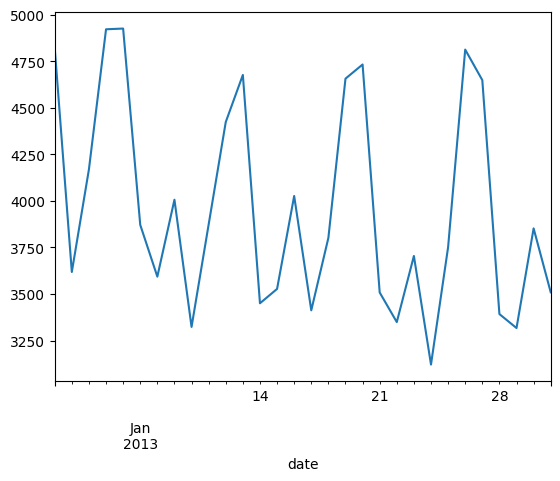

In [8]:
# let us consider the transactions for a particular store only

transactions.query('store_nbr==44').set_index(
    'date').loc['2013-01', 'transactions'].plot()

# we can now see how store 44 did per time

<Axes: xlabel='date'>

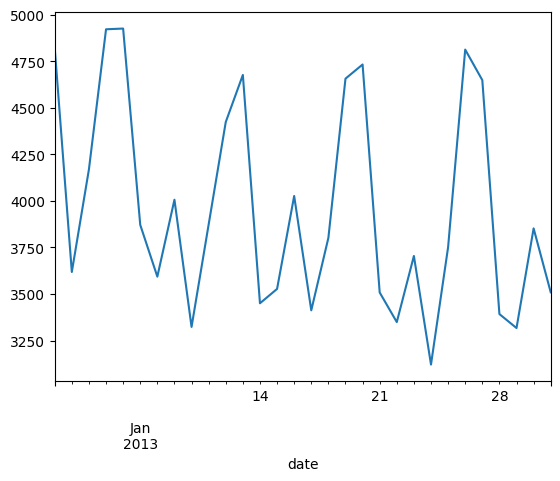

In [9]:
transactions.query('store_nbr==44').set_index(
    'date').loc['2013-01', 'transactions'].plot()

In [10]:
# comparing data

(transactions.query('store_nbr in [44,47]').pivot_table(
    index='date', columns='store_nbr'))

transactions      
store_nbr            44    47
date                         
2013-01-02         4821  4161
2013-01-03         3618  3660
2013-01-04         4169  3915
2013-01-05         4921  4764
2013-01-06         4925  4935
...                 ...   ...
2017-08-11         4418  4009
2017-08-12         4277  3825
2017-08-13         4392  3741
2017-08-14         4039  3606
2017-08-15         3815  3581

[1677 rows x 2 columns]

In [11]:
# comparing data

make_plot = (transactions.query('store_nbr in [44,47]').pivot_table(
    index='date', columns='store_nbr')).droplevel(0, axis=1)
make_plot

store_nbr,44,47
date,,
2013-01-02,4821,4161
2013-01-03,3618,3660
2013-01-04,4169,3915
2013-01-05,4921,4764
2013-01-06,4925,4935
...,...,...
2017-08-11,4418,4009
2017-08-12,4277,3825
2017-08-13,4392,3741


<Axes: title={'center': 'store 44 transactions'}, xlabel='date', ylabel='daily transaction'>

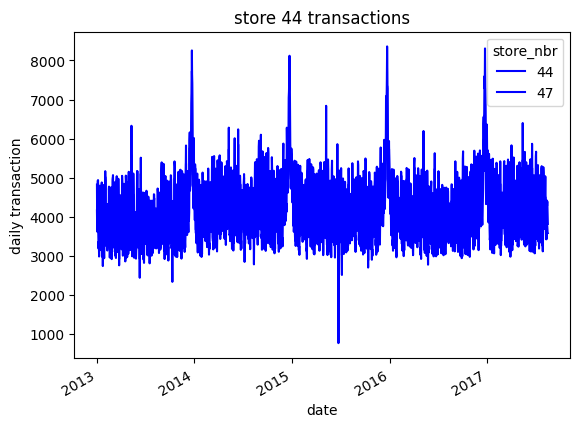

In [12]:
make_plot.plot(
    title='store 44 transactions',  # plot name
    xlabel='date',  # x axis name
    ylabel='daily transaction',  # y axis name
    color='blue'
)

<Axes: title={'center': 'transactions of store 44 and 47'}, xlabel='date', ylabel='store'>

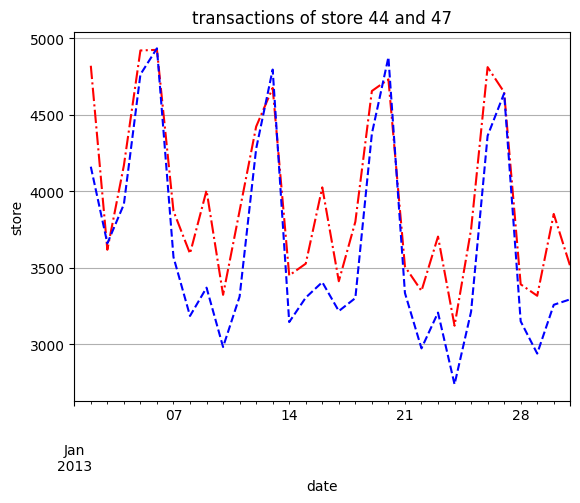

In [13]:
transactions.pivot_table(
    index='date',
    columns='store_nbr',

).loc['2013-01', ('transactions', [44, 47])].plot(
    title='transactions of store 44 and 47',
    xlabel='date',
    ylabel='store',
    color=['red', 'blue'],
    style=['-.', '--'],
    legend=False,  # legend represent the data of which plot represent whom
    grid=True
)

MATPLOT AND SEABORN HAVE PREMADE STYLE FORMATE

In [14]:
import seaborn as sns

In [15]:
sns.set_style("darkgrid")

array([<Axes: xlabel='date', ylabel='store'>,
       <Axes: xlabel='date', ylabel='store'>], dtype=object)

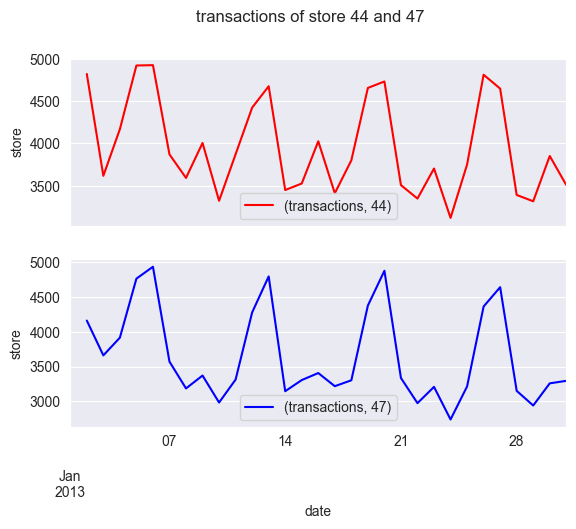

In [16]:
transactions.pivot_table(
    index='date',
    columns='store_nbr',

).loc['2013-01', ('transactions', [44, 47])].plot(
    title='transactions of store 44 and 47',
    xlabel='date',
    ylabel='store',
    color=['red', 'blue'],
    subplots=True
)

SUBPLOTS


array([[<Axes: title={'center': 'store 44'}, xlabel='date', ylabel='store'>,
        <Axes: title={'center': 'store 47'}, xlabel='date', ylabel='store'>],
       [<Axes: xlabel='date', ylabel='store'>,
        <Axes: xlabel='date', ylabel='store'>]], dtype=object)

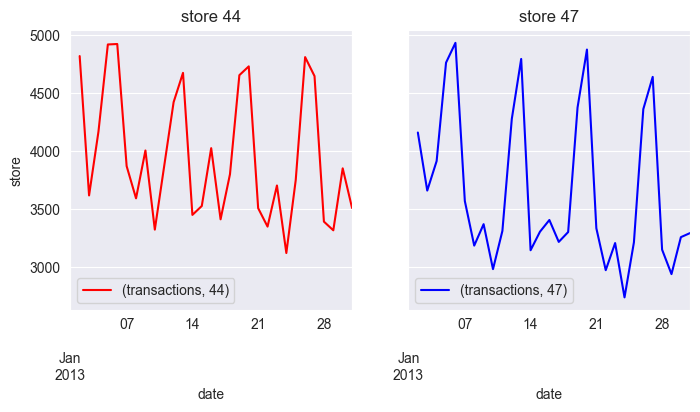

In [17]:
transactions.pivot_table(
    index='date',
    columns='store_nbr',

).loc['2013-01', ('transactions', [44, 47])].plot(

    xlabel='date',
    ylabel='store',
    color=['red', 'blue'],

    # subplot arguments
    subplots=True,
    layout=(2, 2),
    figsize=(8, 8),
    sharey=True,  # if true then easy compareable
    title=['store 44', 'store 47'],
)

BARCHART

array([<Axes: title={'center': '(transactions, 44)'}, xlabel='date', ylabel='store'>,
       <Axes: title={'center': '(transactions, 47)'}, xlabel='date', ylabel='store'>],
      dtype=object)

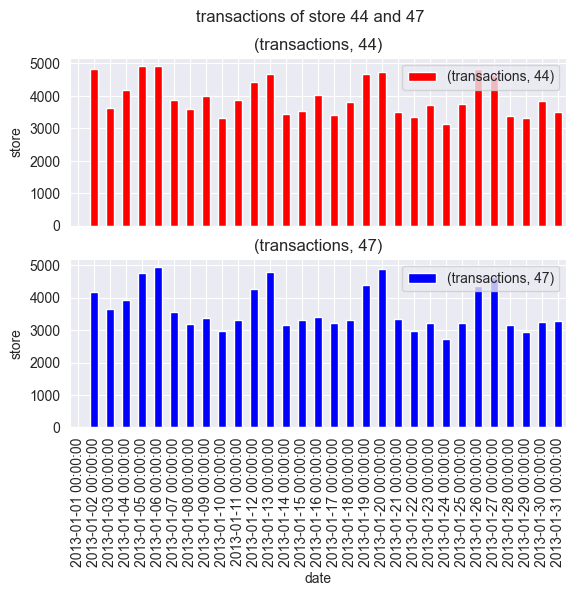

In [18]:
transactions.pivot_table(
    index='date',
    columns='store_nbr',

).loc['2013-01', ('transactions', [44, 47])].plot.bar(
    title='transactions of store 44 and 47',
    xlabel='date',
    ylabel='store',
    color=['red', 'blue'],
    subplots=True,

)

<Axes: xlabel='date'>

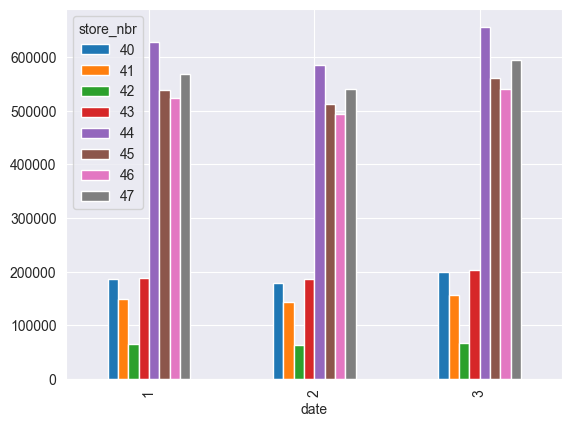

In [19]:
transactions.query('40<= store_nbr <=47 and date.dt.month in [1,2,3]').pivot_table(
    index=transactions['date'].dt.month,
    columns='store_nbr',
    values='transactions',
    aggfunc=({'transactions': 'sum'})
).plot.bar(
    subplots=False
)

<Axes: xlabel='date'>

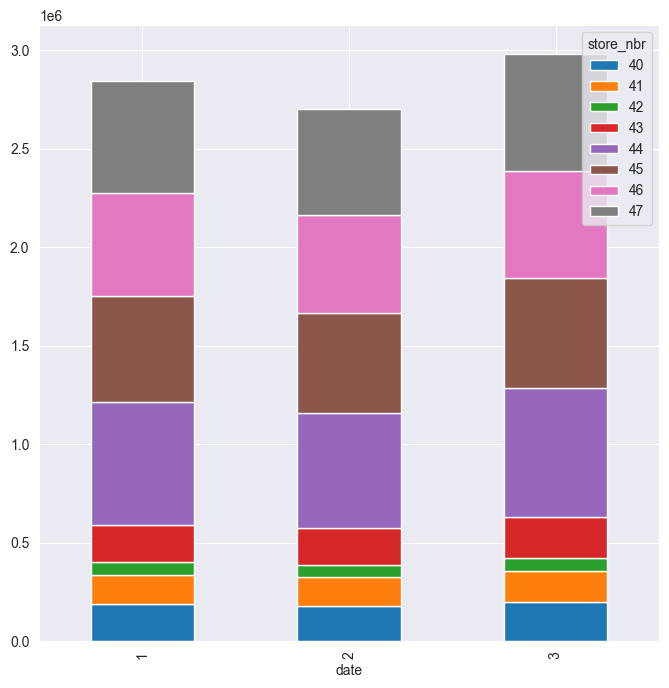

In [20]:
# keeping stack true

transactions.query('40<= store_nbr <=47 and date.dt.month in [1,2,3]').pivot_table(
    index=transactions['date'].dt.month,
    columns='store_nbr',
    values='transactions',
    aggfunc=({'transactions': 'sum'})
).plot.bar(
    stacked=True,
    figsize=(8, 8),

)

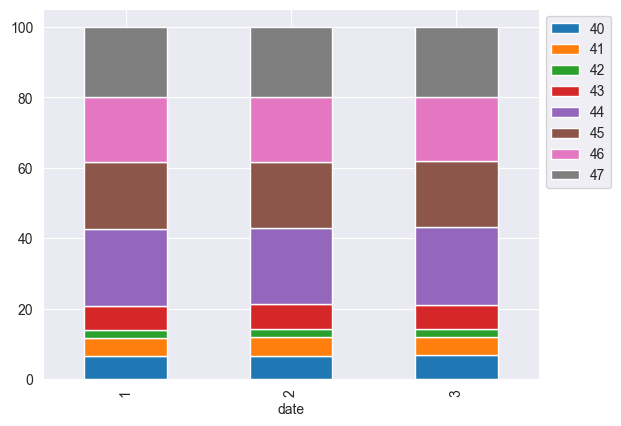

In [21]:
# stack 100% plot

stack_100Plt = transactions.query('40<= store_nbr <=47 and date.dt.month in [1,2,3]').pivot_table(
    index=transactions['date'].dt.month,
    columns='store_nbr',
    values='transactions',
    aggfunc=({'transactions': 'sum'})
).apply(lambda x: x*100/sum(x), axis=1)

stack_100Plt.plot.bar(
    stacked=True
).legend(bbox_to_anchor=(1, 1))

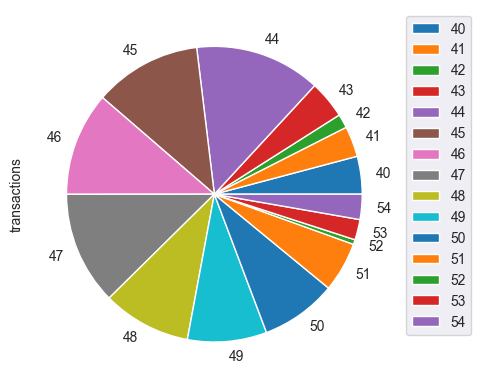

In [22]:
(transactions
 .query('40<= store_nbr')
 .groupby(['store_nbr'])
 .agg({'transactions': 'sum'})
 .plot.pie(y='transactions').legend(bbox_to_anchor=(1, 1)))

In [29]:
# lets find out how co-related the sales between store 44 and store 47

(transactions.query('40<= store_nbr').pivot_table(
    index=transactions.date.dt.month,
    columns='store_nbr',
    values='transactions',
    aggfunc='sum'

)).plot.scatter(x=44, y=47)

TypeError: PlotAccessor.scatter() missing 1 required positional argument: 'x'

HISTOGRAM


<Axes: ylabel='Frequency'>

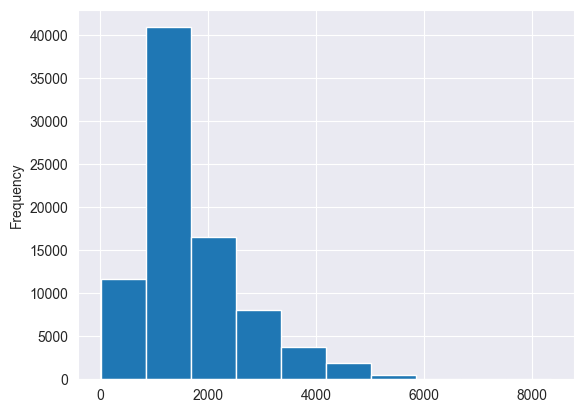

In [24]:
# gives the frequency

# lets see mean sales for all the store

transactions.loc[:, 'transactions'].plot.hist()
# here data are deviated from 1000 to 2000
# by the graph we may say this is a standard normal distribution

<Axes: ylabel='Frequency'>

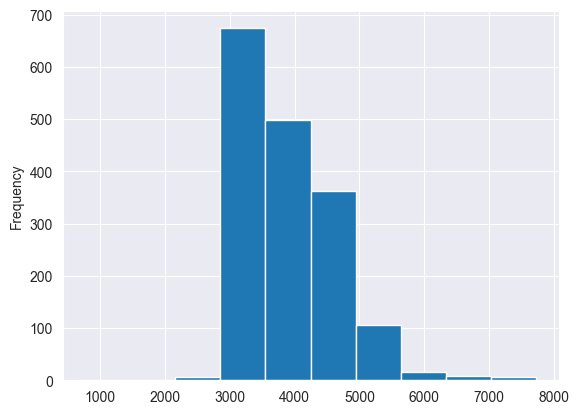

In [25]:
# for a particular store

transactions.query('store_nbr==47').loc[:, 'transactions'].plot.hist()

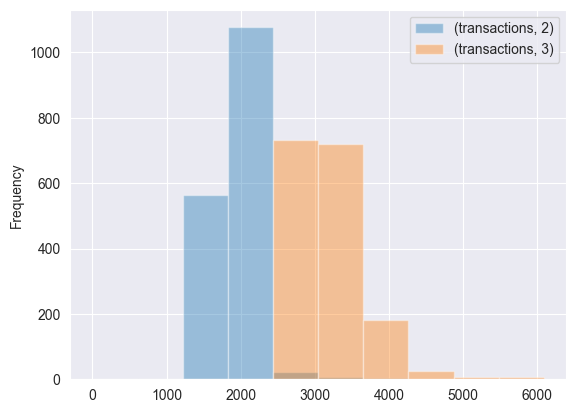

In [26]:
transactions.query('store_nbr in [2,3]').drop('date', axis=1).pivot_table(
    index=transactions.query('store_nbr in [2,3]').index,
    columns='store_nbr'
).plot.hist(alpha=0.4).legend(bbox_to_anchor=(1, 1))